In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from WindPy import w
import datetime
import empyrical
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [36]:
today = datetime.datetime.today()

In [3]:
theme = pd.read_excel(u'../data/行业分类表.xlsx', sheet_name=u'中信二级行业')

In [4]:
theme

,金融地产,可选消费,必选医药,信息科技,其他经济敏感,其他经济不敏感
0,保险,白酒,其他医药医疗,IT服务,油田服务,金属制品
1,证券,白色家电,中药生产,电子设备,运输设备,电站设备
2,股份制与城商行,乘用车,零售,半导体,化学制品,输变电设备
3,房地产开发管理,小家电,生物医药,传媒,建筑施工,合成纤维及树脂
4,国有银行,商用车,品牌服饰,计算机软件,工程机械,航空航天
5,信托及其他,照明设备及其他,其他饮料,新能源设备,普钢,造纸
6,NaN,汽车销售及服务,化学制药,计算机硬件,航空机场,电信运营
7,NaN,黑色家电,食品,增值服务,石油化工,其他军工
8,NaN,其他轻工,NaN,其他元器件,煤炭开采洗选,综合
9,NaN,建筑装修,NaN,汽车零部件,发电及电网,兵器兵装


In [6]:
mv = pd.read_excel(u'../data/行业分类表.xlsx', sheet_name=u'行业市值')

In [17]:
mv[u'行业名称'] = [x.rstrip(u'\(中信\)').rstrip(u'Ⅱ') for x in mv[u'名称']]

In [20]:
mv = mv.set_index(u'行业名称')

In [21]:
mv

,代码,名称,总市值（亿元）
行业名称,,,
石油开采,CI005101.WI,石油开采Ⅱ(中信),11084.441325
石油化工,CI005102.WI,石油化工(中信),10818.979336
油田服务,CI005103.WI,油田服务Ⅱ(中信),1850.441855
煤炭开采洗选,CI005104.WI,煤炭开采洗选(中信),7439.204476
煤炭化工,CI005105.WI,煤炭化工(中信),800.282170
贵金属,CI005106.WI,贵金属(中信),2680.508889
工业金属,CI005107.WI,工业金属(中信),5774.631166
稀有金属,CI005108.WI,稀有金属Ⅱ(中信),4685.537761
发电及电网,CI005109.WI,发电及电网(中信),15855.953803


In [61]:
columns = [u'金融地产', u'可选消费', u'必选医药', u'信息科技']
returns = {}
for col in columns:
    print(col)
    sectors = theme[col].dropna().tolist()
    codes, weights = [], []
    for s in sectors:
#         print(s)
    #     print(mv.loc[s][u'代码'])
    #     print(mv.loc[s][u'总市值（亿元）'])
        codes.append(mv.loc[s][u'代码'])
        weights.append(mv.loc[s][u'总市值（亿元）'])
    weights = np.array(weights)
    weights /= weights.sum()
    data = w.wsd(codes, 'close', '2010-01-01', today, 'Period=M')
    df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=codes)
    df = df.pct_change()
    returns[col] = df.mul(weights, axis=1).sum(axis=1)

金融地产
可选消费
必选医药
信息科技


In [62]:
df = pd.DataFrame(returns)

In [64]:
rets = df.mul(np.array([0.3, 0.3, 0.15, 0.25])).sum(axis=1)

In [117]:
data = w.wsd('000906.SH, 881001.WI, 000001.SH, 000300.SH', 'close', '2010-01-01', today, 'Period=M')

In [118]:
bench = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [119]:
bench = bench.pct_change()

In [120]:
bench.head()

,000906.SH,881001.WI,000001.SH,000300.SH
2010-01-29,NaN,NaN,NaN,NaN
2010-02-26,0.032900,0.031000,0.020958,0.024191
2010-03-31,0.021180,0.025550,0.018730,0.019484
2010-04-30,-0.078994,-0.076927,-0.076708,-0.083166
2010-05-31,-0.090590,-0.083031,-0.097005,-0.095881


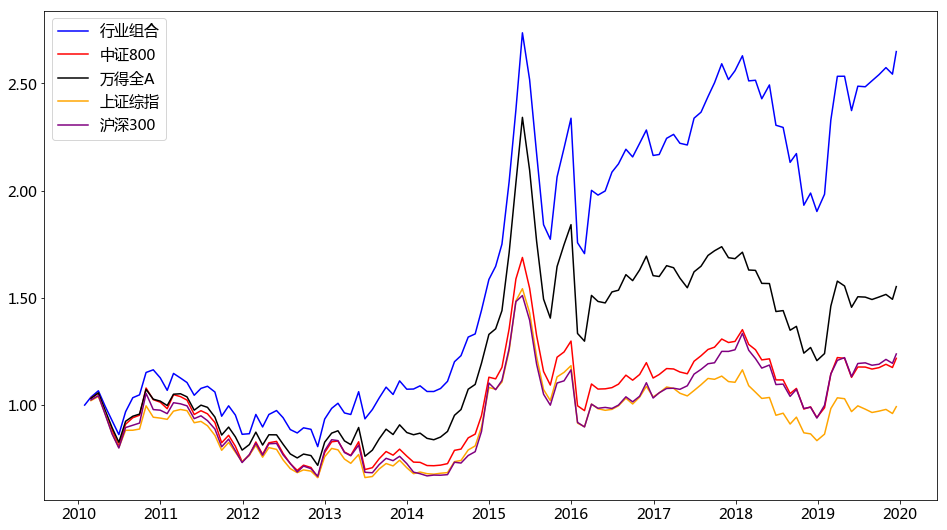

In [122]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + rets).cumprod(), color='blue', label=u'行业组合')
ax.plot((1 + bench['000906.SH']).cumprod(), color='red', label=u'中证800')
ax.plot((1 + bench['881001.WI']).cumprod(), color='black', label=u'万得全A')
ax.plot((1 + bench['000001.SH']).cumprod(), color='orange', label=u'上证综指')
ax.plot((1 + bench['000300.SH']).cumprod(), color='purple', label=u'沪深300')

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])
ax.legend(fontsize=15)

In [124]:
rets.index = pd.to_datetime(rets.index)
bench.index = pd.to_datetime(bench.index)

In [125]:
year_ret_df = pd.DataFrame()
year_ret_df[u'行业组合'] = rets.resample('Y').apply(lambda x: empyrical.cum_returns_final(x))
year_ret_df[u'中证800'] = bench['000906.SH'].resample('Y').apply(lambda x: empyrical.cum_returns_final(x))
year_ret_df[u'万得全A'] = bench['881001.WI'].resample('Y').apply(lambda x: empyrical.cum_returns_final(x))
year_ret_df[u'上证综指'] = bench['000001.SH'].resample('Y').apply(lambda x: empyrical.cum_returns_final(x))
year_ret_df[u'沪深300'] = bench['000300.SH'].resample('Y').apply(lambda x: empyrical.cum_returns_final(x))

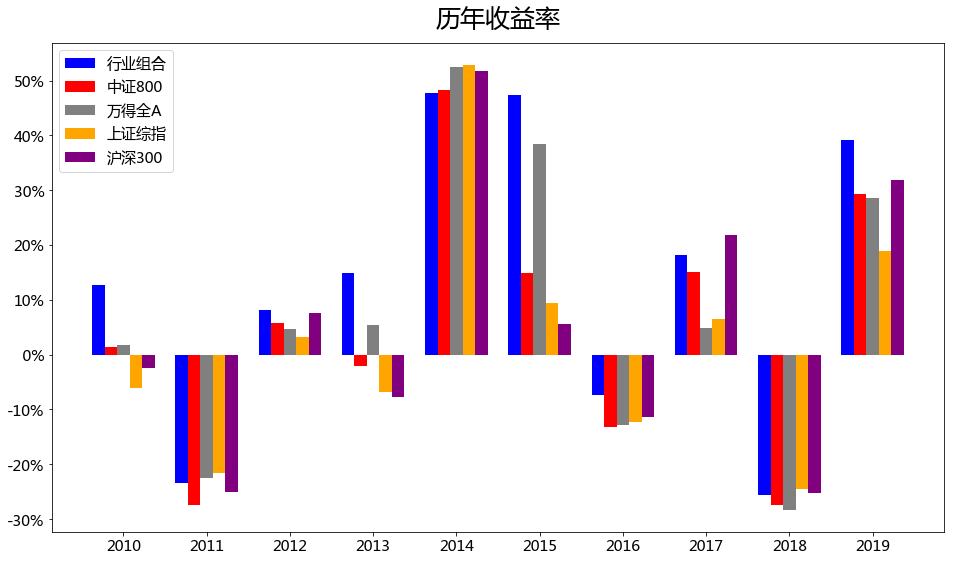

In [128]:
fig, ax = plt.subplots(figsize=(16, 9))

x = np.arange(year_ret_df.shape[0])

ax.bar(x - 0.3, year_ret_df[u'行业组合'], width=0.15, align='center', label=u'行业组合', color='blue')
ax.bar(x - 0.15, year_ret_df[u'中证800'], width=0.15, align='center', label=u'中证800', color='red')
ax.bar(x, year_ret_df[u'万得全A'], width=0.15, align='center', label=u'万得全A', color='gray')
ax.bar(x + 0.15, year_ret_df[u'上证综指'], width=0.15, align='center', label=u'上证综指', color='orange')
ax.bar(x + 0.3, year_ret_df[u'沪深300'], width=0.15, align='center', label=u'沪深300', color='purple')

ax.set_xticks(x)
ax.set_xticklabels(year_ret_df.index.year)

ax.legend(fontsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])

_ = ax.set_title(u'历年收益率', fontsize=25, y=1.02)

In [129]:
year_ret_df

,行业组合,中证800,万得全A,上证综指,沪深300
2010-12-31,0.127127,0.013531,0.018519,-0.060621,-0.023686
2011-12-31,-0.233615,-0.273821,-0.224183,-0.216753,-0.250145
2012-12-31,0.082174,0.058067,0.046796,0.031695,0.075545
2013-12-31,0.149000,-0.021356,0.054406,-0.067493,-0.076468
2014-12-31,0.476512,0.482758,0.524395,0.528691,0.516595
2015-12-31,0.474059,0.149136,0.384978,0.094138,0.055834
2016-12-31,-0.074335,-0.132709,-0.129106,-0.123064,-0.112818
2017-12-31,0.182626,0.151617,0.049301,0.065579,0.217751
2018-12-31,-0.256484,-0.273835,-0.282535,-0.245913,-0.253098
2019-12-31,0.391888,0.293427,0.285985,0.189976,0.318060


In [94]:
def metric(daily_ret):
    an_ret = empyrical.annual_return(daily_ret, period='monthly')
    sharpe = empyrical.sharpe_ratio(daily_ret, risk_free=0.015/365, period='monthly')
    vol = empyrical.annual_volatility(daily_ret, period='monthly')
    maxdraw = empyrical.max_drawdown(daily_ret)
    print('Annual return: %.2f%%'%(an_ret*100))
    print('Sharpe ratio: %.2f'%(sharpe))
    print('Annual volatility: %.2f%%'%(vol*100))
    print('Max drawdown: %.2f%%'%(maxdraw*100))

In [130]:
metric(rets)

Annual return: 10.23%
Sharpe ratio: 0.53
Annual volatility: 23.84%
Max drawdown: -37.64%


In [131]:
metric(bench['881001.WI'])

Annual return: 4.50%
Sharpe ratio: 0.30
Annual volatility: 24.80%
Max drawdown: -48.44%


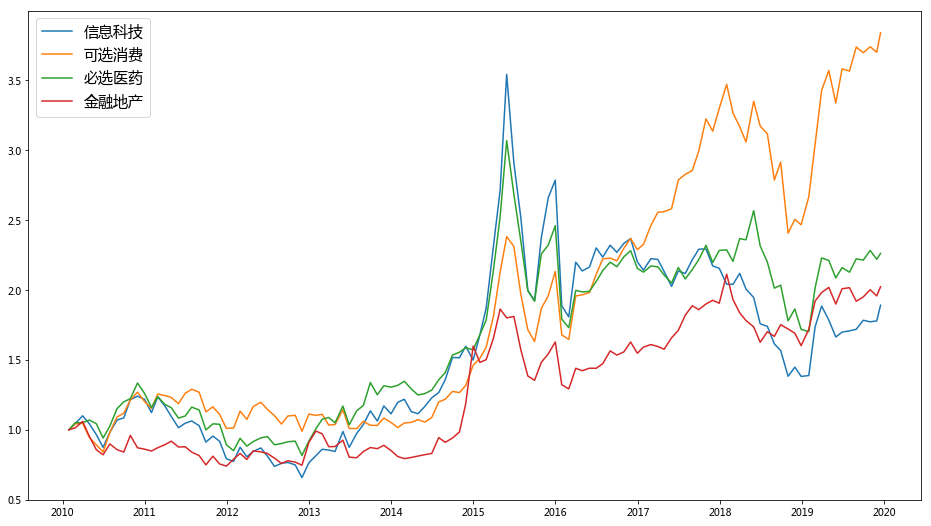

In [98]:
(1 + df).cumprod().plot(figsize=(16, 9))
plt.legend(fontsize=15)